In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2
import random
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('football.png')
print(img.size)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

167256


In [3]:
#Aplicamos filtro gaussiano para eliminar ruido
filter_size = 5 #El filtro tiene que ser numero impar
img_gauss = cv2.GaussianBlur(img,(filter_size,filter_size), sigmaX=1)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

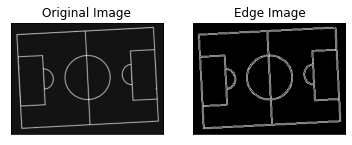

In [8]:
##https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html
img = cv.imread('football.png',0)
edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
cv2.imshow('image', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

(202, 276)


55752

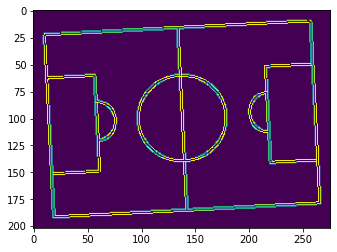

In [312]:
print(edges.shape)
plt.imshow(edges)
202*276

In [23]:

dup = []
for k in edges:
    for i in k:
        dup.append(i)

print (max(dup), min(dup))

255 0


In [37]:
print(edges[43][1])

0


In [550]:
coordenadas_bordes = []

for x in range(len(edges)):
    for y in range(len(edges[x])):
        if(edges[x][y] > 0):
            coordenadas_bordes.append([x,y])

print(coordenadas_bordes)

9], [98, 177], [98, 179], [98, 200], [98, 202], [98, 216], [98, 218], [98, 260], [98, 262], [99, 13], [99, 15], [99, 58], [99, 60], [99, 75], [99, 77], [99, 96], [99, 98], [99, 137], [99, 139], [99, 177], [99, 179], [99, 200], [99, 202], [99, 216], [99, 218], [99, 260], [99, 262], [100, 13], [100, 15], [100, 58], [100, 60], [100, 75], [100, 77], [100, 96], [100, 98], [100, 137], [100, 139], [100, 177], [100, 179], [100, 200], [100, 202], [100, 216], [100, 218], [100, 260], [100, 262], [101, 13], [101, 15], [101, 58], [101, 60], [101, 75], [101, 77], [101, 96], [101, 98], [101, 137], [101, 139], [101, 177], [101, 179], [101, 201], [101, 203], [101, 216], [101, 218], [101, 260], [101, 262], [102, 13], [102, 15], [102, 58], [102, 60], [102, 75], [102, 77], [102, 96], [102, 98], [102, 137], [102, 139], [102, 177], [102, 179], [102, 201], [102, 203], [102, 216], [102, 218], [102, 260], [102, 262], [103, 13], [103, 15], [103, 58], [103, 60], [103, 75], [103, 77], [103, 96], [103, 98], [103, 

In [714]:

#a[0] = x1
#a[1] = y1
#b[0] = x2
#b[1] = y2

def calcular_recta(a,b):
    #m = (b[1]-a[1])/(b[0]-a[0])
    #b = a[1] - m*a[0]
    #return(m,b)
    if(b[0]-a[0] != 0):
        A = (b[1]-a[1])/(b[0]-a[0])
        B = -1
        C = a[1] - A*a[0]
    else:
        A = 1
        B = 0
        C = -a[0]
        
    # ax + by = c
    return(A, B, C)

def calcular_inliner(recta, punto, tolerancia):
    A = recta[0]
    B = recta[1]
    C = recta[2]

    valor = A*punto[0] + B*punto[1] + C

    #m = recta[0]
    #b = recta[1]
    #valor = punto[1] - m*punto[0]
    #if(abs(valor - b) < tolerancia): return True
    
    if(abs(valor) <= tolerancia): return True
    else: return False

def total_inliners(recta, tolerancia, coordenadas_bordes):
    inliners = 0
    for punto in coordenadas_bordes:
        if(calcular_inliner(recta, punto, tolerancia)): inliners+= 1
    return inliners

In [564]:
recta = calcular_recta([1,2],[3,4])
print(f'{recta[0]}x + {recta[1]}y + {recta[2]} = 0')
print(f'{recta[0]}x + {recta[1]}y = {-recta[2]}')

1.0x + -1y + 1.0 = 0
1.0x + -1y = -1.0


In [844]:

a = coordenadas_bordes[random.randint(0, len(coordenadas_bordes) - 1)]
b = coordenadas_bordes[random.randint(0, len(coordenadas_bordes) - 1)]
recta = calcular_recta(a,b)
inliners = total_inliners(recta, 10, coordenadas_bordes)
print(a,b)
print(f"Recta: {recta[0]}x + {recta[1]}y = {-recta[2]}")
print("Inliners: ", inliners)

[191, 41] [14, 194]
Recta: -0.864406779661017x + -1y = -206.10169491525426
Inliners:  195


In [877]:

def ransac(edges_points, iterations, inliners_needed, tolerancia):

    rectas = []

    for x in range(0, iterations):
        a = edges_points[random.randint(0, len(edges))]
        b = edges_points[random.randint(0, len(edges))]
   
        recta = calcular_recta(a,b)
        inliners = total_inliners(recta, tolerancia, edges)

        if(inliners >= inliners_needed): rectas.append(recta)
    
    return rectas

In [876]:
print(len(coordenadas_bordes), len(coordenadas_bordes[0]))

3368 2


In [891]:
x = ransac(coordenadas_bordes, 10000, 50, 5)

for r in x:
    print(f"Recta: {r[0]}x + {r[1]}y = {-r[2]}")

Recta: 19.0x + -1y = 1.0
Recta: 19.0x + -1y = -4.0
Recta: 16.0x + -1y = -4.0
Recta: 18.0x + -1y = -1.0
Recta: 19.0x + -1y = -5.0
Recta: 16.0x + -1y = -2.0
Recta: 22.0x + -1y = 1.0
Recta: 16.0x + -1y = 4.0
Recta: 18.0x + -1y = -3.0
Recta: 23.0x + -1y = 4.0
Recta: 15.0x + -1y = -4.0
Recta: 23.0x + -1y = 4.0
Recta: 19.0x + -1y = 3.0
Recta: 18.5x + -1y = 1.0
Recta: 22.0x + -1y = 2.0
Recta: 19.0x + -1y = 1.0
Recta: 22.0x + -1y = -2.0
Recta: 16.0x + -1y = 1.0
Recta: 18.0x + -1y = -4.0
Recta: 19.0x + -1y = -2.0
Recta: 16.0x + -1y = 5.0
Recta: 18.0x + -1y = -1.0
Recta: 23.0x + -1y = 5.0
Recta: 16.0x + -1y = 3.0
Recta: 16.0x + -1y = -4.0
Recta: 18.333333333333332x + -1y = -1.3333333333333428
Recta: 13.0x + -1y = -2.0
